# Author: Ashwin S

# TasK 1: Prediction using Supervised ML

This project is Based on Supervised learing. Under Supervised learing, I've used Liner Regression, and libraries like Numpy, Pandas, Seaborn, Matplotlib, and sklearn. In this model, my task is to predict the mark obtained by a student if he studies 9.25 hrs 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Reading the data:

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")  # Reading the dataset...

# Analysing the data:

In [4]:
df.head()              # Gives first five values

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()              # Gives Last Five values 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.isnull().sum()  # To check number number of null values through the column...

Hours     0
Scores    0
dtype: int64

# Visualizing the data:

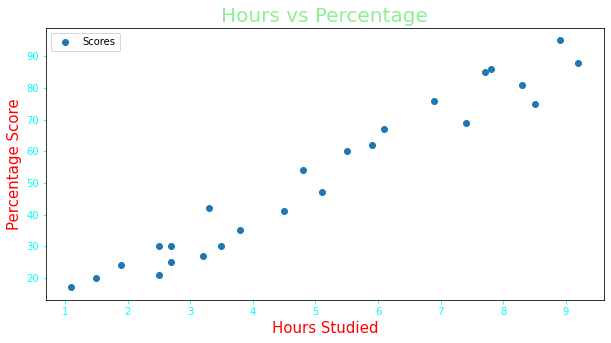

In [7]:
df.plot(x='Hours', y='Scores', style='o', figsize=(10, 5))      # Using plot to visualize the data
plt.title('Hours vs Percentage',color="lightgreen", size=20)      # Giving title to the Dataset in light green of size 20
plt.xlabel('Hours Studied', color="red",size=15)                    # Giving a label to X-axis
plt.ylabel('Percentage Score', color="red",size=15)                   # Giving a label to Y-axis
plt.tick_params(colors='cyan', which='both')                            # Giving color to the parameters 

# Data preprocessing 

In [8]:
X = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values 

# Model Training

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


# Plotting the line of Regression:

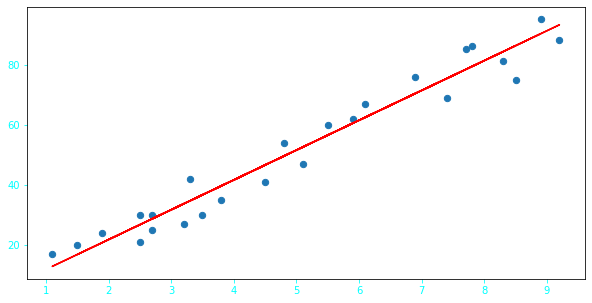

In [10]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=40)
plt.plot(X, line, color="red")
plt.tick_params(colors='cyan', which='both')
plt.show()

# Making Predictions

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted values:

In [12]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
print("Training Score: ",regressor.score(X_train, y_train))
print("Test Score: ",regressor.score(X_test, y_test))

Training Score:  0.9515510725211552
Test Score:  0.9454906892105356


# Predicting Values

In [14]:
n = float(input("Enter the Number of Hours: "))
own_pred = regressor.predict(np.array([n]).reshape(-1,1)) # Asking the input and converting it into an numpy array and reshaping it and predicting the value using regressor    
print("No of Hours = {}\nPredicted Score = {}".format(n,own_pred[0]))  # Printing the values of hours and Predicted Score.
print("Hence if a student studies for {0} Hours then his score will be {1:.2f}%".format(n,own_pred[0]))

Enter the Number of Hours: 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538
Hence if a student studies for 9.25 Hours then his score will be 93.69%


# Evaluation:

In [15]:
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred)) 
print("Root Mean Squared Error: ",np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R - 2: ",r2_score(y_test, y_pred))

Mean Squared Error:  21.5987693072174
Mean Absolute Error:  4.183859899002975
Root Mean Squared Error:  2.0454485813637495
R - 2:  0.9454906892105356
